COURSE PROJECT -1

GROUP MEMBER :1. ANUJ MEENA (202001038) 2. ANKIT RATHWA (202001190) 3. HEMISH SALAVIYA (202001206) 4. HARSH PARMAR (202001072) 5. CHANDRAPRAKASH CHAUDHARY (202001009)

CONTRIBUTION::
ANKIT RATHWA (25%)
ANUJ MEENA (25%)
HEMISH SALAVIYA(20%)
HARSH PARMAR (20%)
CHANDRAPRAKASH CHAUDHARAY(10%)

ANKIT AND ANUJ:: done EDA and visualization and train the model with random forrest regression and xgb regressor.

HEMISH AND HARSH :: train model with linear regression.

CHANDRAPRAKASH CHAUDHARY :: documentation


This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding. I was particularly curious on whether socioeconomic status has an impact on obesity.

CDC Data: Nutrition, Physical Activity, & Obesity

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load csv file
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/datamining/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df

In [ ]:
# seeing 5 value of dataset
df.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2011     2011           AL      Alabama   
1       2011     2011           AL      Alabama   
2       2011     2011           AL      Alabama   
3       2011     2011           AL      Alabama   
4       2011     2011           AL      Alabama   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   

                     Topic                                           Question  \
0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
1  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
2  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
3  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
4  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   

   Data_Value_Unit Data_Value_Type  ...  \
0              NaN           Value  ...   
1              NaN           Value  ...   
2              NaN           Value  ...   
3              NaN           Value  ...   
4              NaN           Value  ...   

                               GeoLocation  ClassID TopicID QuestionID  \
0  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
1  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
2  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
3  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
4  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   

   DataValueTypeID  LocationID  StratificationCategory1  \
0            VALUE           1                    Total   
1            VALUE           1                   Gender   
2            VALUE           1                   Gender   
3            VALUE           1                Education   
4            VALUE           1                Education   

         Stratification1 StratificationCategoryId1 StratificationID1  
0                  Total                       OVR           OVERALL  
1                   Male                       GEN              MALE  
2                 Female                       GEN            FEMALE  
3  Less than high school                       EDU             EDUHS  
4   High school graduate                       EDU         EDUHSGRAD  

[5 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [ ]:
# drop the column not required
df = df.drop(['Data_Value_Footnote_Symbol','Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total', 'Education', 'Income','Race/Ethnicity' , 'Gender','Age(years)'],1)

<ipython-input-18-2e00e5bebc8b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Data_Value_Footnote_Symbol','Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total', 'Education', 'Income','Race/Ethnicity' , 'Gender','Age(years)'],1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  53392 non-null  int64  
 1   YearEnd                    53392 non-null  int64  
 2   LocationAbbr               53392 non-null  object 
 3   LocationDesc               53392 non-null  object 
 4   Datasource                 53392 non-null  object 
 5   Class                      53392 non-null  object 
 6   Topic                      53392 non-null  object 
 7   Question                   53392 non-null  object 
 8   Data_Value_Type            53392 non-null  object 
 9   Data_Value                 48346 non-null  float64
 10  Data_Value_Alt             48346 non-null  float64
 11  Low_Confidence_Limit       48346 non-null  float64
 12  High_Confidence_Limit      48346 non-null  float64
 13  Sample_Size                48346 non-null  flo

In [ ]:
#duplicates
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53392 entries, 0 to 53391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  53392 non-null  int64  
 1   YearEnd                    53392 non-null  int64  
 2   LocationAbbr               53392 non-null  object 
 3   LocationDesc               53392 non-null  object 
 4   Datasource                 53392 non-null  object 
 5   Class                      53392 non-null  object 
 6   Topic                      53392 non-null  object 
 7   Question                   53392 non-null  object 
 8   Data_Value_Type            53392 non-null  object 
 9   Data_Value                 48346 non-null  float64
 10  Data_Value_Alt             48346 non-null  float64
 11  Low_Confidence_Limit       48346 non-null  float64
 12  High_Confidence_Limit      48346 non-null  float64
 13  Sample_Size                48346 non-null  flo

In [ ]:
#droping null value
df=df.dropna(subset=['Data_Value_Alt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48346 entries, 0 to 53386
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  48346 non-null  int64  
 1   YearEnd                    48346 non-null  int64  
 2   LocationAbbr               48346 non-null  object 
 3   LocationDesc               48346 non-null  object 
 4   Datasource                 48346 non-null  object 
 5   Class                      48346 non-null  object 
 6   Topic                      48346 non-null  object 
 7   Question                   48346 non-null  object 
 8   Data_Value_Type            48346 non-null  object 
 9   Data_Value                 48346 non-null  float64
 10  Data_Value_Alt             48346 non-null  float64
 11  Low_Confidence_Limit       48346 non-null  float64
 12  High_Confidence_Limit      48346 non-null  float64
 13  Sample_Size                48346 non-null  flo

In [ ]:
df.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2011     2011           AL      Alabama   
1       2011     2011           AL      Alabama   
2       2011     2011           AL      Alabama   
3       2011     2011           AL      Alabama   
4       2011     2011           AL      Alabama   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   

                     Topic                                           Question  \
0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
1  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
2  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
3  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
4  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   

  Data_Value_Type  Data_Value  ...                              GeoLocation  \
0           Value        32.0  ...  (32.84057112200048, -86.63186076199969)   
1           Value        32.3  ...  (32.84057112200048, -86.63186076199969)   
2           Value        31.8  ...  (32.84057112200048, -86.63186076199969)   
3           Value        33.6  ...  (32.84057112200048, -86.63186076199969)   
4           Value        32.8  ...  (32.84057112200048, -86.63186076199969)   

   ClassID  TopicID  QuestionID DataValueTypeID LocationID  \
0      OWS     OWS1        Q036           VALUE          1   
1      OWS     OWS1        Q036           VALUE          1   
2      OWS     OWS1        Q036           VALUE          1   
3      OWS     OWS1        Q036           VALUE          1   
4      OWS     OWS1        Q036           VALUE          1   

  StratificationCategory1        Stratification1 StratificationCategoryId1  \
0                   Total                  Total                       OVR   
1                  Gender                   Male                       GEN   
2                  Gender                 Female                       GEN   
3               Education  Less than high school                       EDU   
4               Education   High school graduate                       EDU   

   StratificationID1  
0            OVERALL  
1               MALE  
2             FEMALE  
3              EDUHS  
4          EDUHSGRAD  

[5 rows x 24 columns]

In [ ]:
df.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit         float64
High_Confidence_Limit        float64
Sample_Size                  float64
GeoLocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
DataValueTypeID               object
LocationID                     int64
StratificationCategory1       object
Stratification1               object
StratificationCategoryId1     object
StratificationID1             object
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.reset_index(inplace=True)
df

index  YearStart  YearEnd LocationAbbr    LocationDesc  \
0          0       2011     2011           AL         Alabama   
1          1       2011     2011           AL         Alabama   
2          2       2011     2011           AL         Alabama   
3          3       2011     2011           AL         Alabama   
4          4       2011     2011           AL         Alabama   
...      ...        ...      ...          ...             ...   
48341  53382       2016     2016           VI  Virgin Islands   
48342  53383       2016     2016           VI  Virgin Islands   
48343  53384       2016     2016           VI  Virgin Islands   
48344  53385       2016     2016           VI  Virgin Islands   
48345  53386       2016     2016           VI  Virgin Islands   

                                       Datasource                    Class  \
0      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
1      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
...                                           ...                      ...   
48341  Behavioral Risk Factor Surveillance System        Physical Activity   
48342  Behavioral Risk Factor Surveillance System        Physical Activity   
48343  Behavioral Risk Factor Surveillance System        Physical Activity   
48344  Behavioral Risk Factor Surveillance System        Physical Activity   
48345  Behavioral Risk Factor Surveillance System        Physical Activity   

                              Topic  \
0           Obesity / Weight Status   
1           Obesity / Weight Status   
2           Obesity / Weight Status   
3           Obesity / Weight Status   
4           Obesity / Weight Status   
...                             ...   
48341  Physical Activity - Behavior   
48342  Physical Activity - Behavior   
48343  Physical Activity - Behavior   
48344  Physical Activity - Behavior   
48345  Physical Activity - Behavior   

                                                Question Data_Value_Type  ...  \
0      Percent of adults aged 18 years and older who ...           Value  ...   
1      Percent of adults aged 18 years and older who ...           Value  ...   
2      Percent of adults aged 18 years and older who ...           Value  ...   
3      Percent of adults aged 18 years and older who ...           Value  ...   
4      Percent of adults aged 18 years and older who ...           Value  ...   
...                                                  ...             ...  ...   
48341  Percent of adults who engage in no leisure-tim...           Value  ...   
48342  Percent of adults who engage in no leisure-tim...           Value  ...   
48343  Percent of adults who engage in no leisure-tim...           Value  ...   
48344  Percent of adults who engage in no leisure-tim...           Value  ...   
48345  Percent of adults who engage in no leisure-tim...           Value  ...   

                                   GeoLocation  ClassID  TopicID  QuestionID  \
0      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
1      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
2      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
3      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
4      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
...                                        ...      ...      ...         ...   
48341                  (18.335765, -64.896335)       PA      PA1        Q047   
48342                  (18.335765, -64.896335)       PA      PA1        Q047   
48343                  (18.335765, -64.896335)       PA      PA1        Q047   
48344                  (18.335765, -64.896335) 

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.describe()

index     YearStart       YearEnd    Data_Value  Data_Value_Alt  \
count  48346.000000  48346.000000  48346.000000  48346.000000    48346.000000   
mean   26574.497063   2013.271646   2013.271646     31.156681       31.156681   
std    15428.538298      1.694433      1.694433     10.247033       10.247033   
min        0.000000   2011.000000   2011.000000      0.900000        0.900000   
25%    13239.250000   2012.000000   2012.000000     24.100000       24.100000   
50%    26445.500000   2013.000000   2013.000000     30.700000       30.700000   
75%    39927.750000   2015.000000   2015.000000     37.000000       37.000000   
max    53386.000000   2016.000000   2016.000000     77.600000       77.600000   

       Low_Confidence_Limit  High_Confidence_Limit    Sample_Size  \
count          48346.000000            48346.000000   48346.00000   
mean              26.892227               35.989997    3889.19286   
std               10.038584               11.205813   19829.42129   
min                0.300000                3.000000      50.00000   
25%               20.000000               28.200000     566.00000   
50%               26.450000               35.600000    1209.00000   
75%               32.900000               42.200000    2519.00000   
max               69.500000               87.700000  476876.00000   

         LocationID  
count  48346.000000  
mean      30.148802  
std       16.781097  
min        1.000000  
25%       17.000000  
50%       30.000000  
75%       44.000000  
max       78.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48346 entries, 0 to 48345
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      48346 non-null  int64  
 1   YearStart                  48346 non-null  int64  
 2   YearEnd                    48346 non-null  int64  
 3   LocationAbbr               48346 non-null  object 
 4   LocationDesc               48346 non-null  object 
 5   Datasource                 48346 non-null  object 
 6   Class                      48346 non-null  object 
 7   Topic                      48346 non-null  object 
 8   Question                   48346 non-null  object 
 9   Data_Value_Type            48346 non-null  object 
 10  Data_Value                 48346 non-null  float64
 11  Data_Value_Alt             48346 non-null  float64
 12  Low_Confidence_Limit       48346 non-null  float64
 13  High_Confidence_Limit      48346 non-null  flo

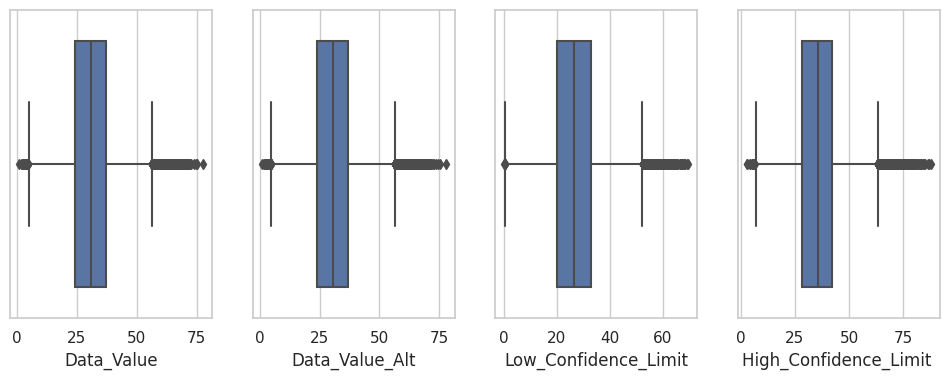

In [ ]:
# plotting data_value,low and high confidence limit
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Data_Value","Data_Value_Alt","Low_Confidence_Limit","High_Confidence_Limit "]):
    sns.boxplot(x=df[col], ax=ax[axid])

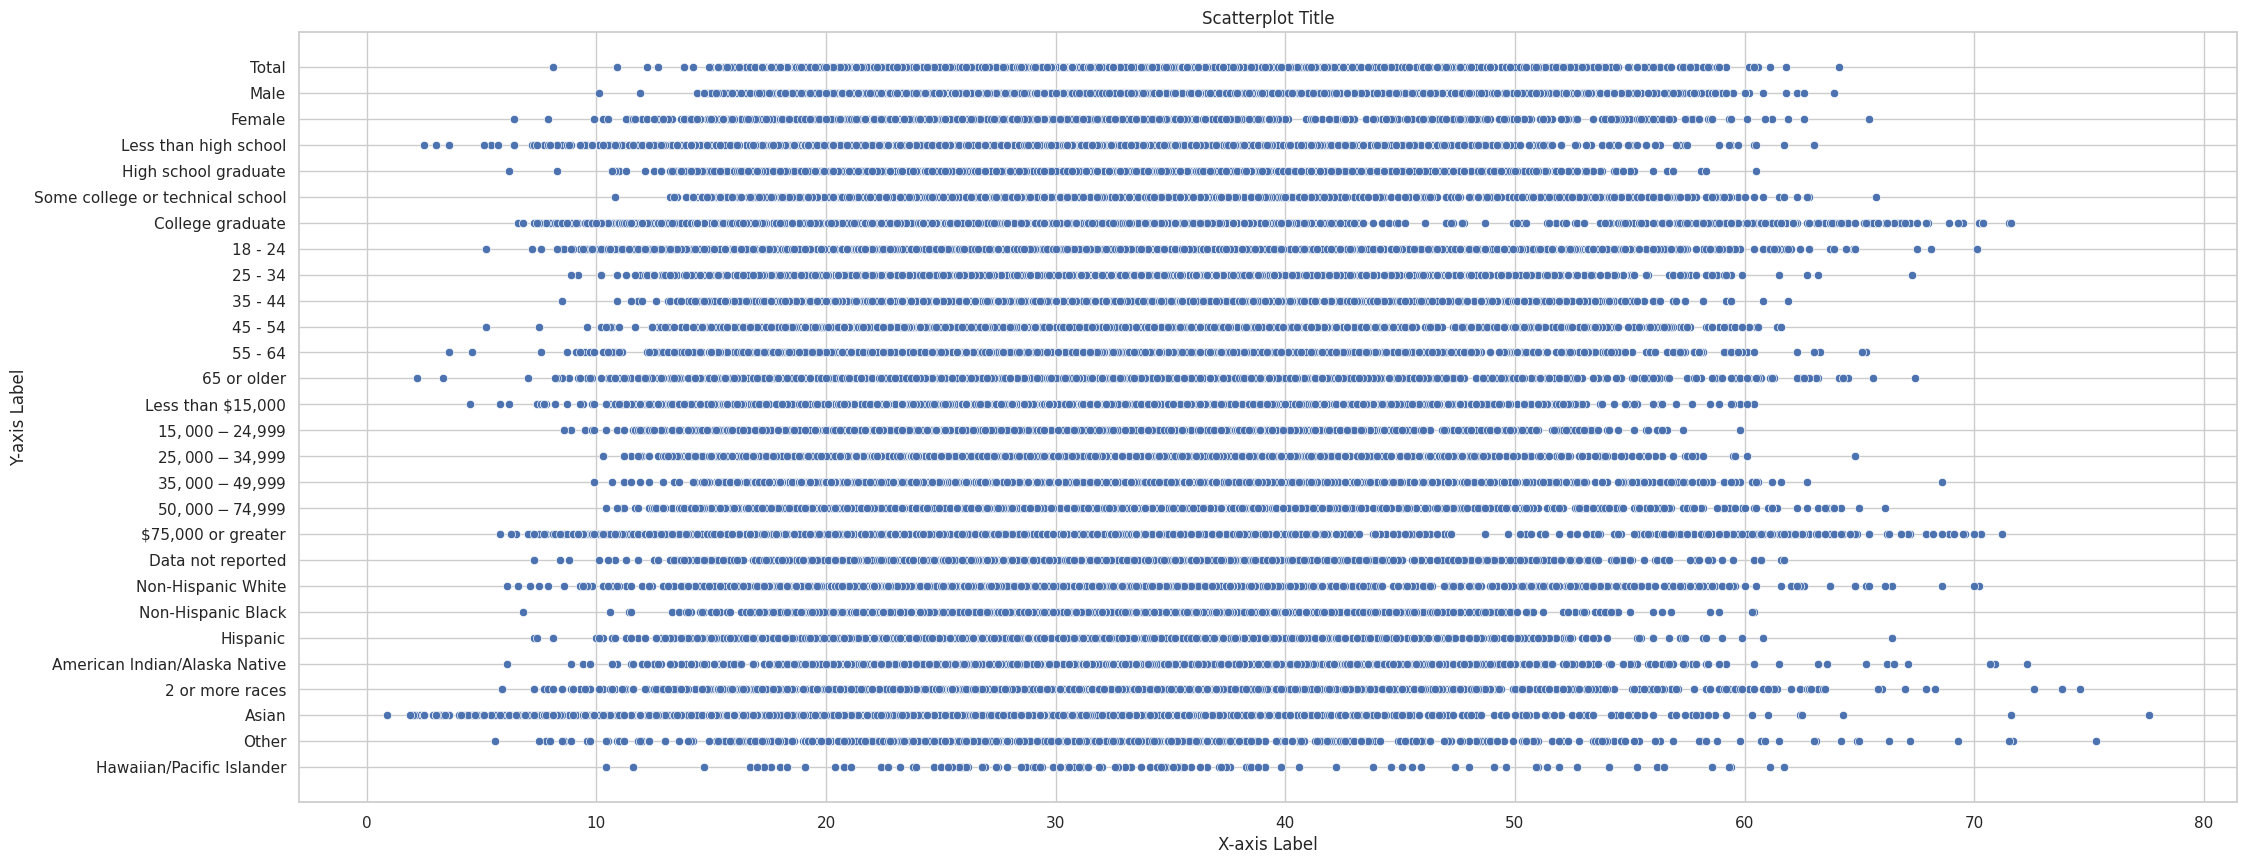

In [ ]:
# visualization::
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(25, 10))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["Stratification1"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()


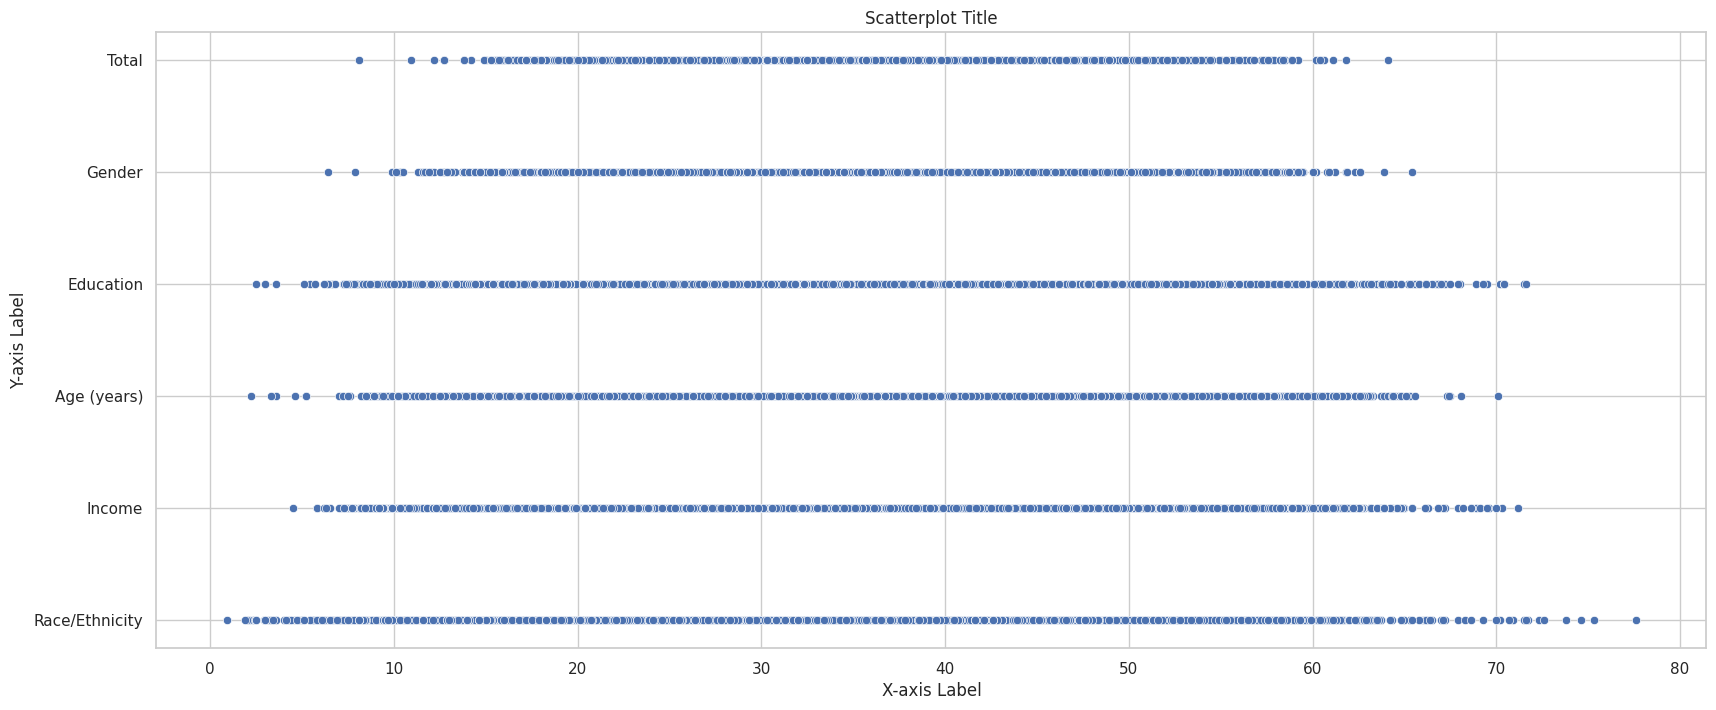

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(20, 8))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["StratificationCategory1"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()


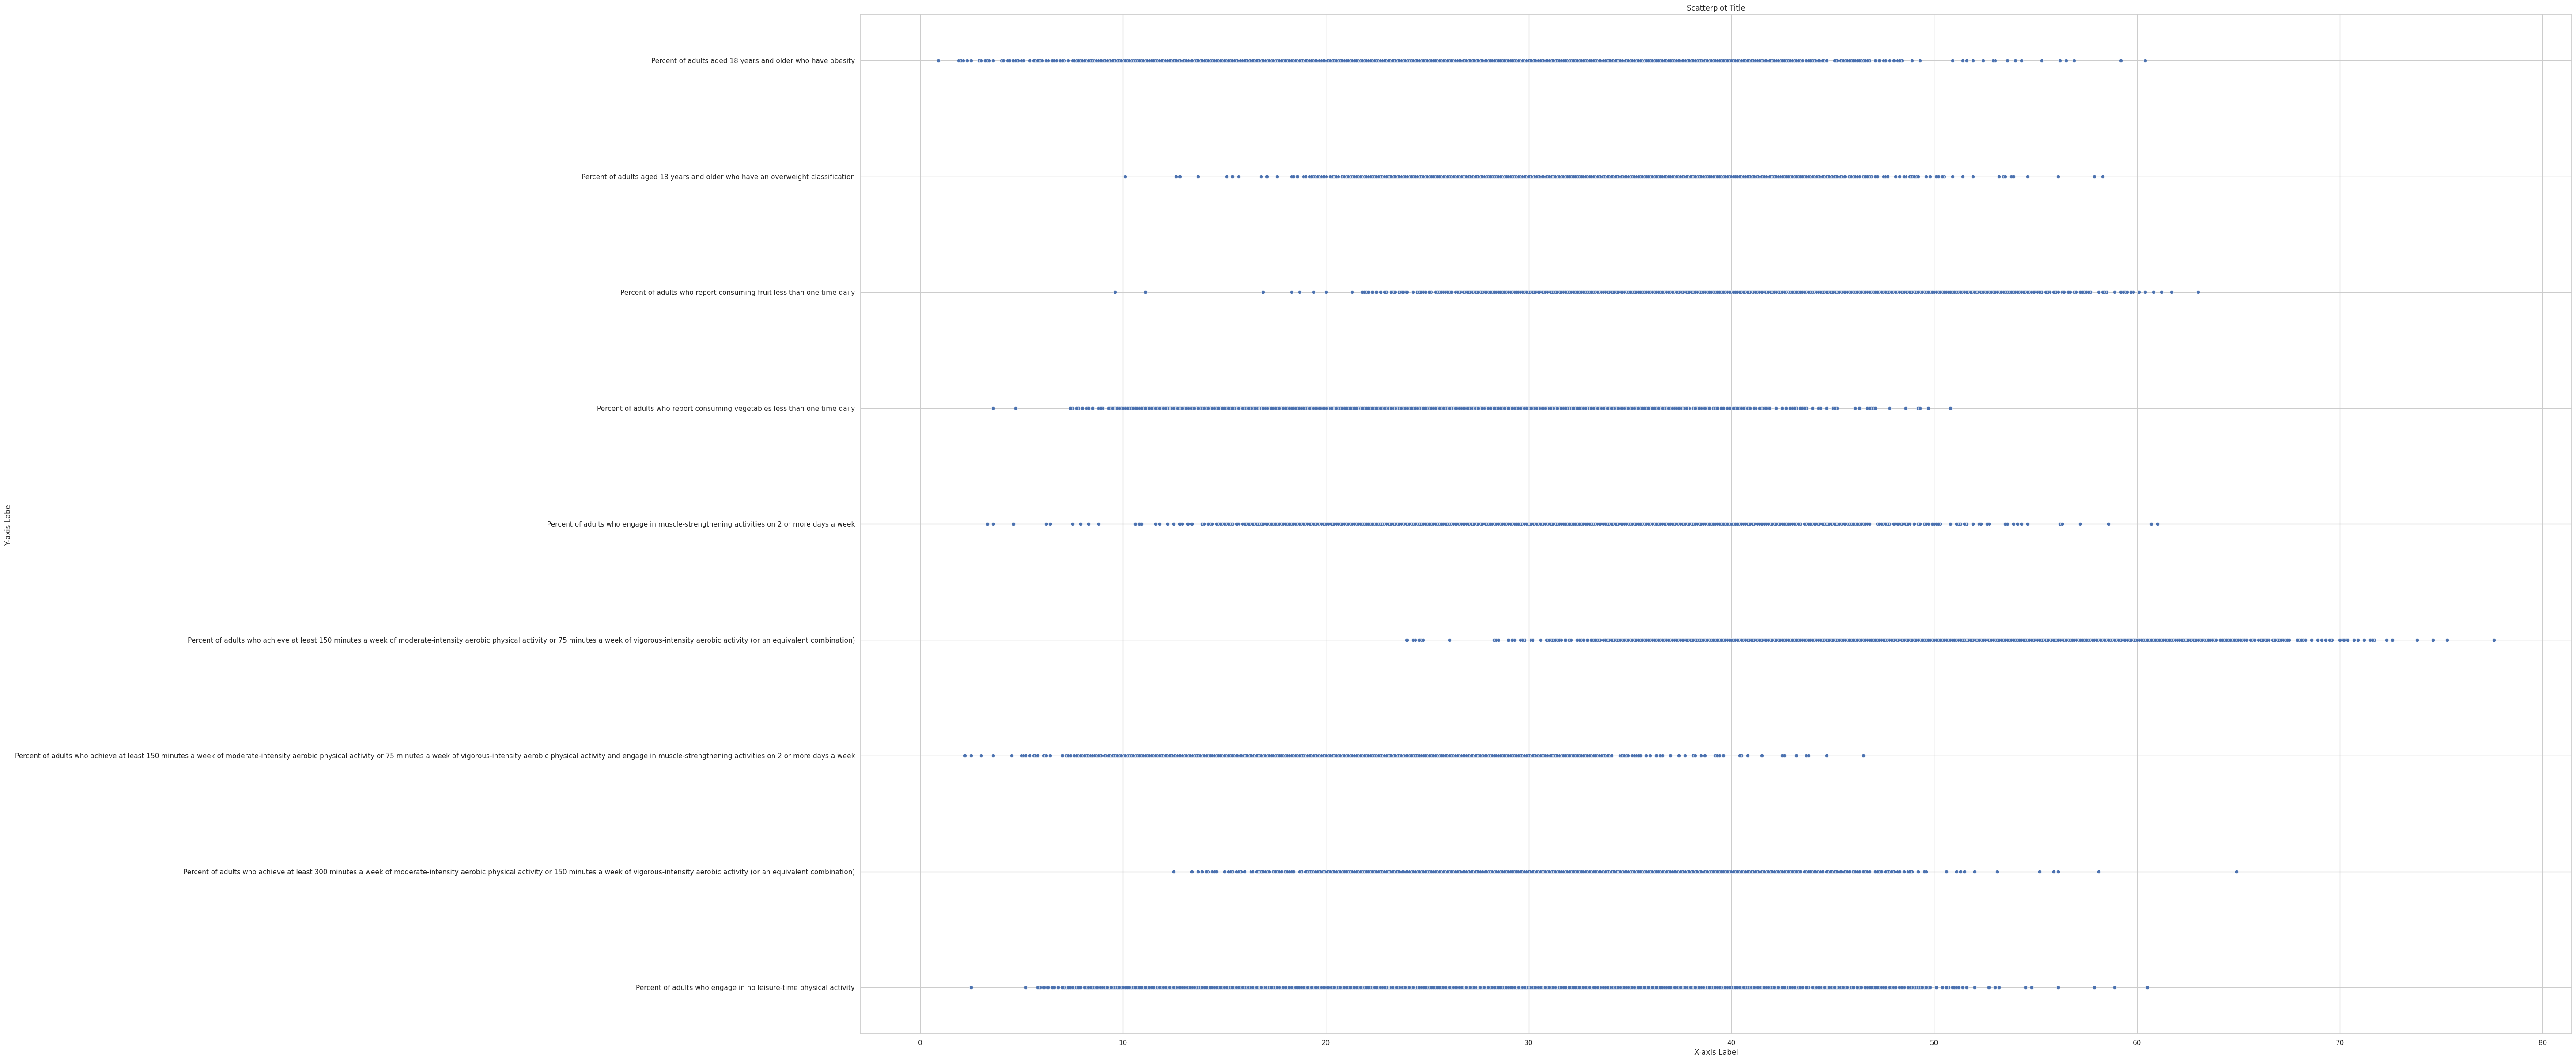

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(50, 30))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["Question"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()


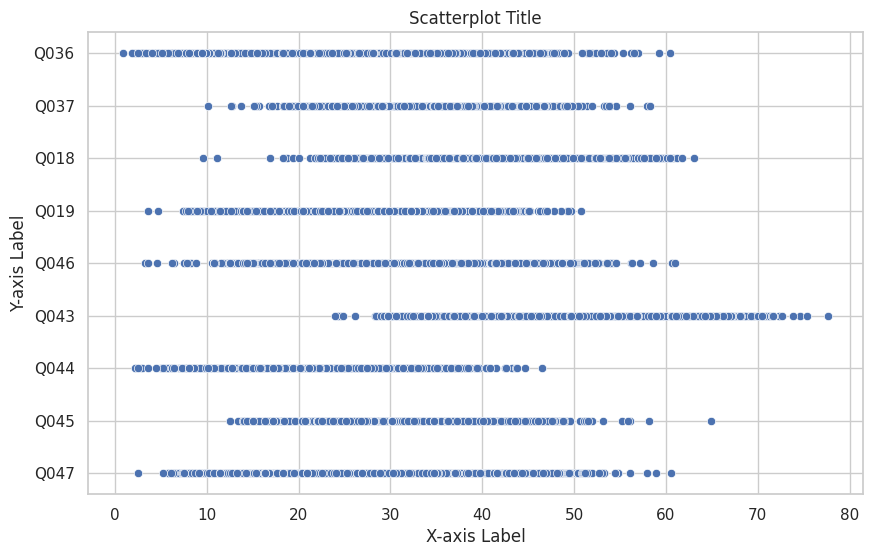

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["QuestionID"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()


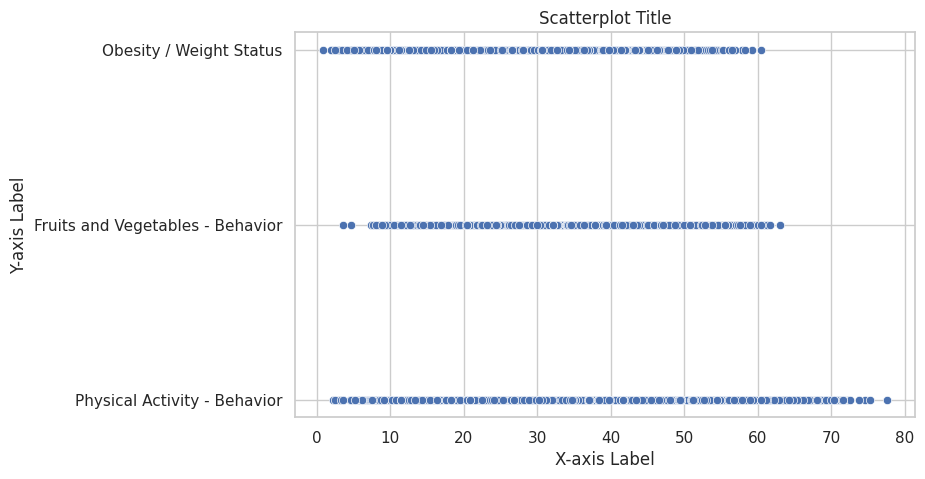

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(8, 5))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["Topic"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()

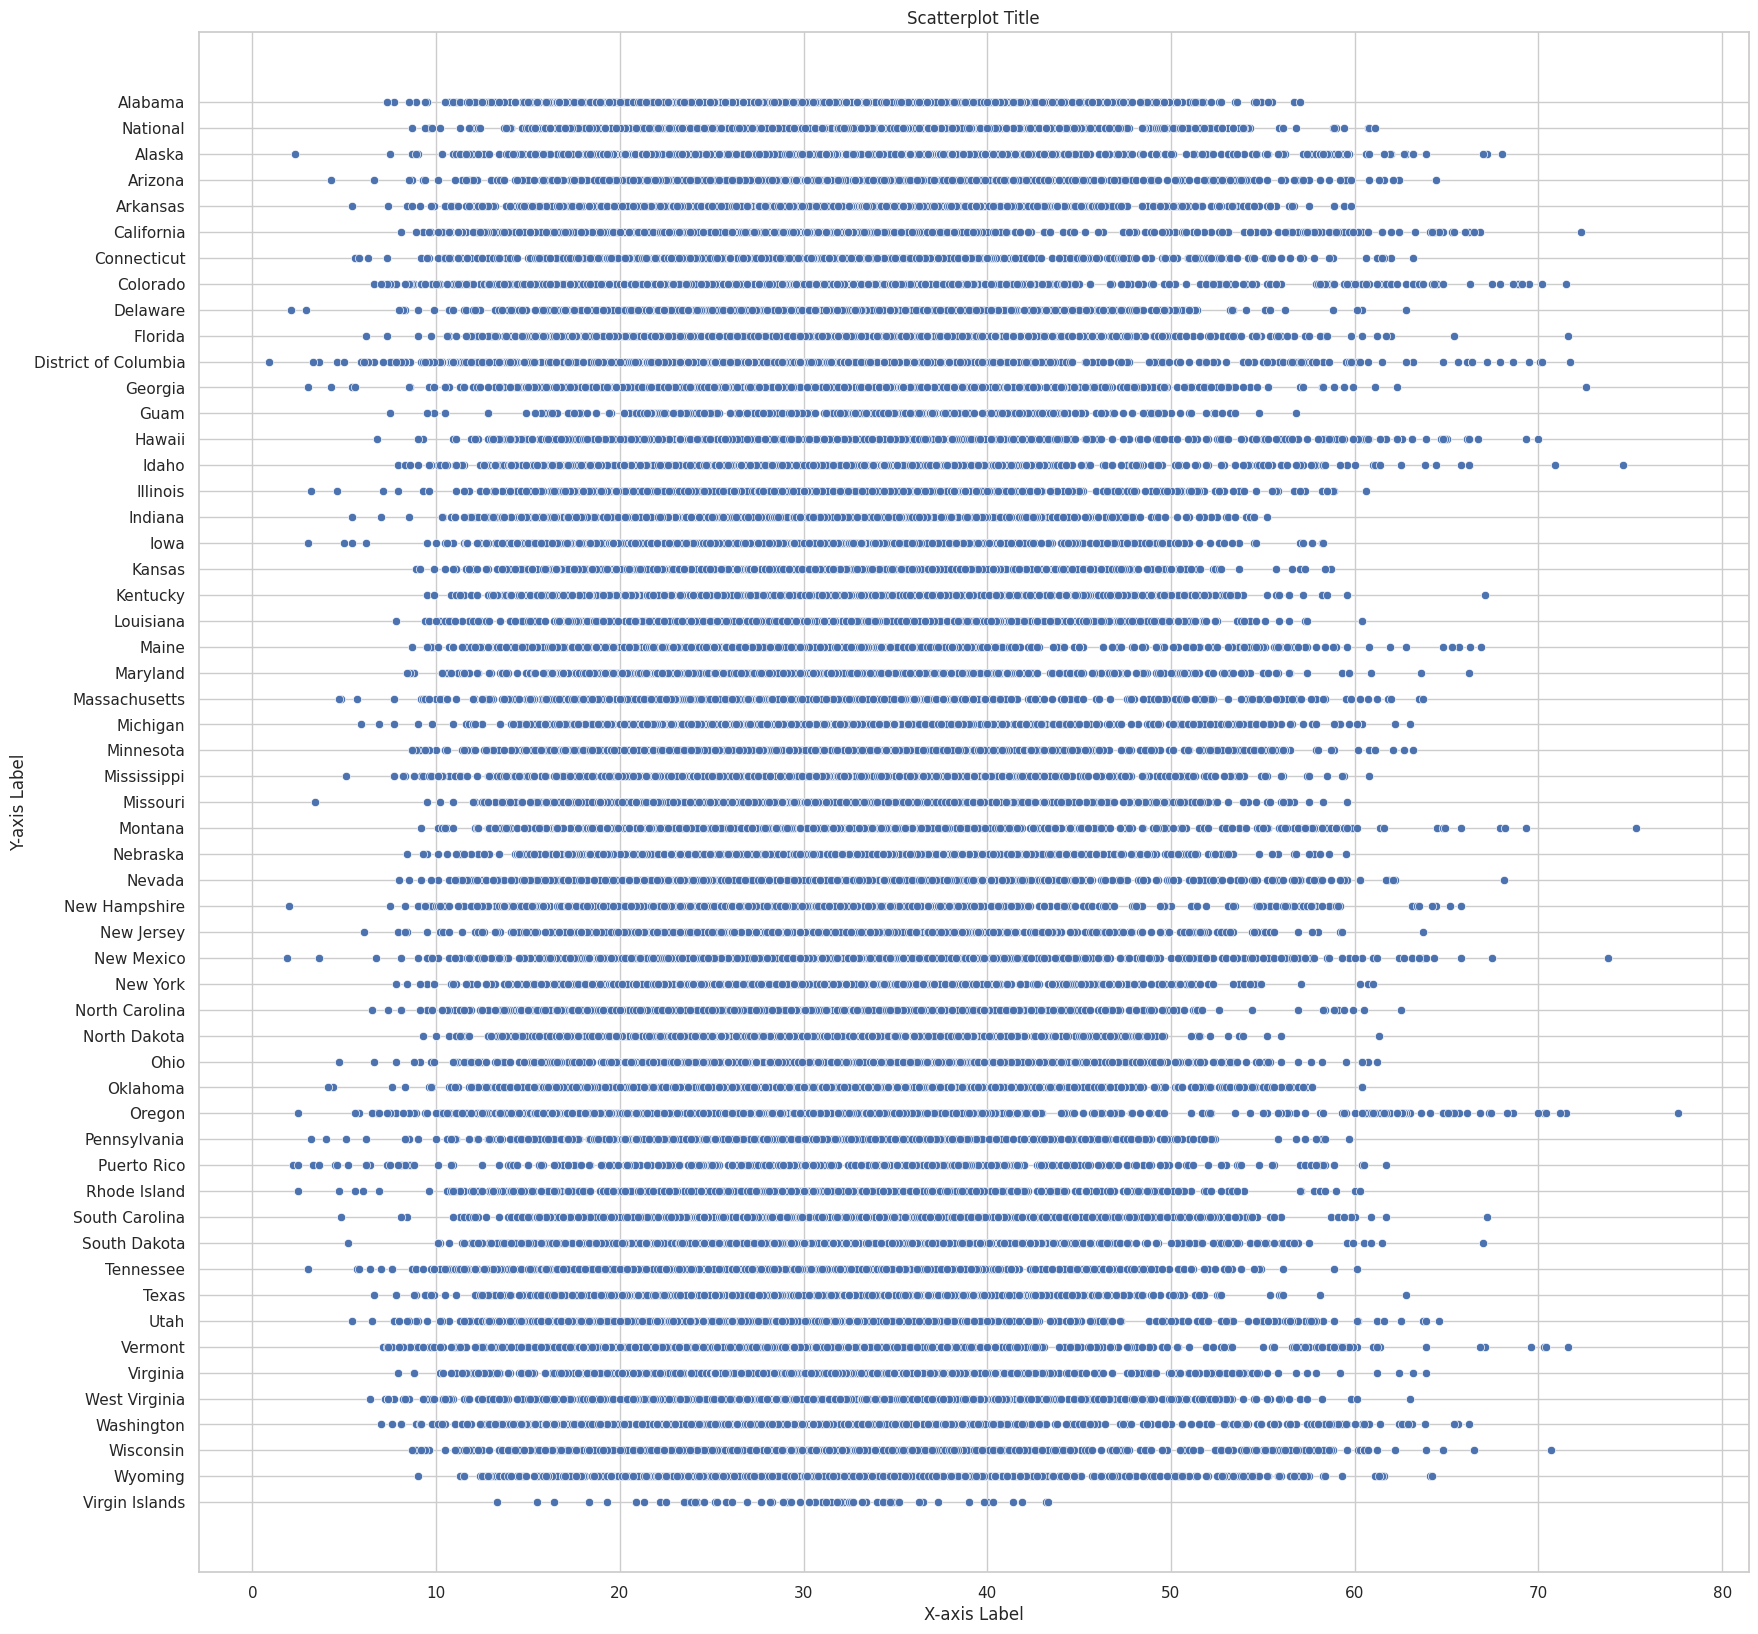

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Stratification1" and "Data_Value"
sns.set(style="whitegrid")  # Optional: Set a style for the plot

# Create a larger figure
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

# Create the scatterplot
sns.scatterplot(y=df["LocationDesc"], x=df["Data_Value"])

# Customize plot labels and title if needed
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatterplot Title")

# Show the plot
plt.show()

In [ ]:
year_begin0 = df["YearStart"].value_counts()
year_begin0

2015    12205
2011    11961
2013    11889
2016     4177
2014     4114
2012     4000
Name: YearStart, dtype: int64

<Axes: ylabel='YearStart'>

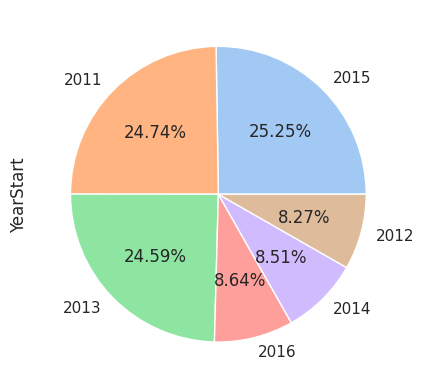

In [ ]:
# distrubution of year
piec_colors = sns.color_palette('pastel')[0:len(year_begin0)]
year_begin0.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: xlabel='Data_Value', ylabel='High_Confidence_Limit '>

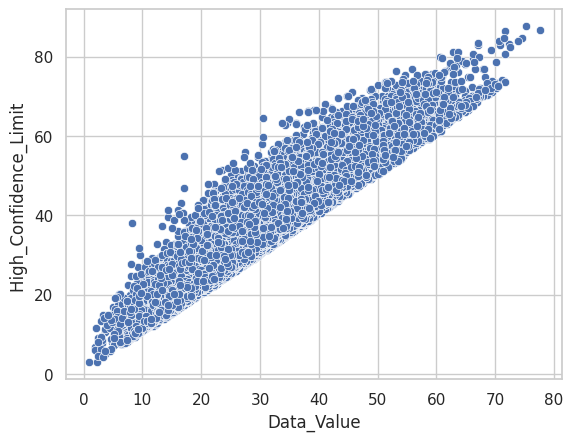

In [ ]:
sns.scatterplot(x=df["Data_Value"], y=df["High_Confidence_Limit "])

<Axes: xlabel='Data_Value', ylabel='Low_Confidence_Limit'>

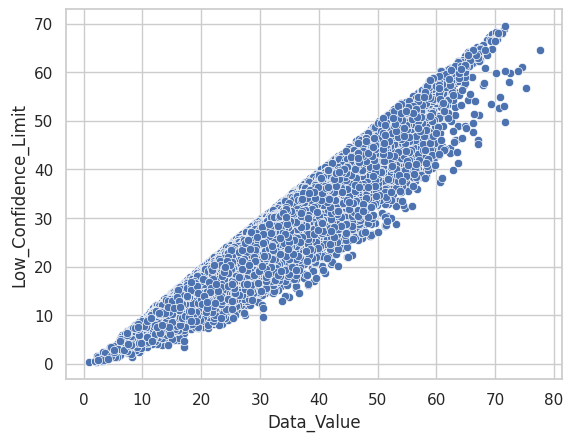

In [ ]:
sns.scatterplot(x=df["Data_Value"], y=df["Low_Confidence_Limit"])

In [ ]:
import numpy as np

def remove_outliers(df):
    df_cleaned = df.copy()  # Create a copy of the original DataFrame
    for col in df_cleaned.select_dtypes(include=np.number).columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

In [ ]:
cleaned_df = remove_outliers(df)

In [ ]:
cleaned_df

index  YearStart  YearEnd LocationAbbr    LocationDesc  \
1          1       2011     2011           AL         Alabama   
2          2       2011     2011           AL         Alabama   
3          3       2011     2011           AL         Alabama   
4          4       2011     2011           AL         Alabama   
5          5       2011     2011           AL         Alabama   
...      ...        ...      ...          ...             ...   
48341  53382       2016     2016           VI  Virgin Islands   
48342  53383       2016     2016           VI  Virgin Islands   
48343  53384       2016     2016           VI  Virgin Islands   
48344  53385       2016     2016           VI  Virgin Islands   
48345  53386       2016     2016           VI  Virgin Islands   

                                       Datasource                    Class  \
1      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
5      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
...                                           ...                      ...   
48341  Behavioral Risk Factor Surveillance System        Physical Activity   
48342  Behavioral Risk Factor Surveillance System        Physical Activity   
48343  Behavioral Risk Factor Surveillance System        Physical Activity   
48344  Behavioral Risk Factor Surveillance System        Physical Activity   
48345  Behavioral Risk Factor Surveillance System        Physical Activity   

                              Topic  \
1           Obesity / Weight Status   
2           Obesity / Weight Status   
3           Obesity / Weight Status   
4           Obesity / Weight Status   
5           Obesity / Weight Status   
...                             ...   
48341  Physical Activity - Behavior   
48342  Physical Activity - Behavior   
48343  Physical Activity - Behavior   
48344  Physical Activity - Behavior   
48345  Physical Activity - Behavior   

                                                Question Data_Value_Type  ...  \
1      Percent of adults aged 18 years and older who ...           Value  ...   
2      Percent of adults aged 18 years and older who ...           Value  ...   
3      Percent of adults aged 18 years and older who ...           Value  ...   
4      Percent of adults aged 18 years and older who ...           Value  ...   
5      Percent of adults aged 18 years and older who ...           Value  ...   
...                                                  ...             ...  ...   
48341  Percent of adults who engage in no leisure-tim...           Value  ...   
48342  Percent of adults who engage in no leisure-tim...           Value  ...   
48343  Percent of adults who engage in no leisure-tim...           Value  ...   
48344  Percent of adults who engage in no leisure-tim...           Value  ...   
48345  Percent of adults who engage in no leisure-tim...           Value  ...   

                                   GeoLocation  ClassID  TopicID  QuestionID  \
1      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
2      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
3      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
4      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
5      (32.84057112200048, -86.63186076199969)      OWS     OWS1        Q036   
...                                        ...      ...      ...         ...   
48341                  (18.335765, -64.896335)       PA      PA1        Q047   
48342                  (18.335765, -64.896335)       PA      PA1        Q047   
48343                  (18.335765, -64.896335)       PA      PA1        Q047   
48344                  (18.335765, -64.896335) 

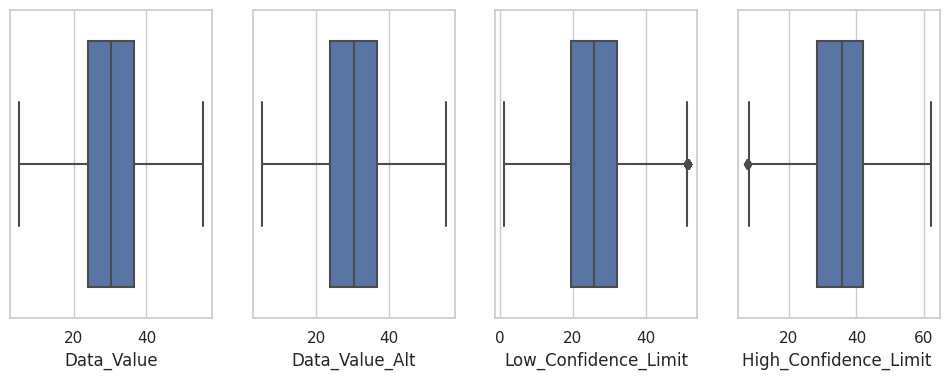

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Data_Value","Data_Value_Alt","Low_Confidence_Limit","High_Confidence_Limit "]):
    sns.boxplot(x=cleaned_df[col], ax=ax[axid])

In [ ]:
cleaned_df.describe()

index     YearStart       YearEnd    Data_Value  Data_Value_Alt  \
count  42196.000000  42196.000000  42196.000000  42196.000000    42196.000000   
mean   26664.610721   2013.291923   2013.291923     30.384733       30.384733   
std    15545.436988      1.693873      1.693873      9.257669        9.257669   
min        1.000000   2011.000000   2011.000000      5.100000        5.100000   
25%    12938.750000   2012.000000   2012.000000     23.900000       23.900000   
50%    26834.500000   2013.000000   2013.000000     30.400000       30.400000   
75%    40059.250000   2015.000000   2015.000000     36.600000       36.600000   
max    53386.000000   2016.000000   2016.000000     55.500000       55.500000   

       Low_Confidence_Limit  High_Confidence_Limit    Sample_Size  \
count          42196.000000            42196.000000  42196.000000   
mean              25.925905               35.491812   1426.188691   
std                9.148144               10.104211   1220.622803   
min                1.300000                7.600000     50.000000   
25%               19.400000               28.400000    530.000000   
50%               25.900000               35.600000   1054.000000   
75%               32.100000               41.900000   1981.000000   
max               51.500000               62.000000   5425.000000   

         LocationID  
count  42196.000000  
mean      29.592734  
std       16.569618  
min        1.000000  
25%       16.000000  
50%       29.000000  
75%       42.000000  
max       78.000000

In [ ]:
year_begin = cleaned_df["YearStart"].value_counts()
year_begin

2015    10693
2013    10271
2011    10214
2016     3752
2014     3685
2012     3581
Name: YearStart, dtype: int64

<Axes: ylabel='YearStart'>

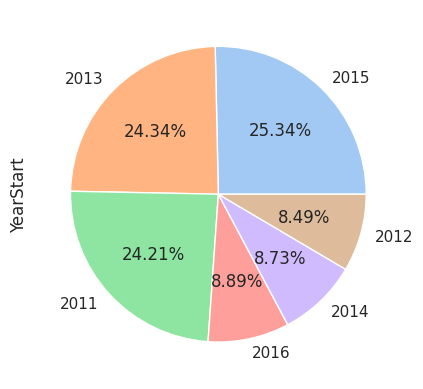

In [ ]:
# distribution of cleaned_df
piec_colors = sns.color_palette('pastel')[0:len(year_begin)]
year_begin.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

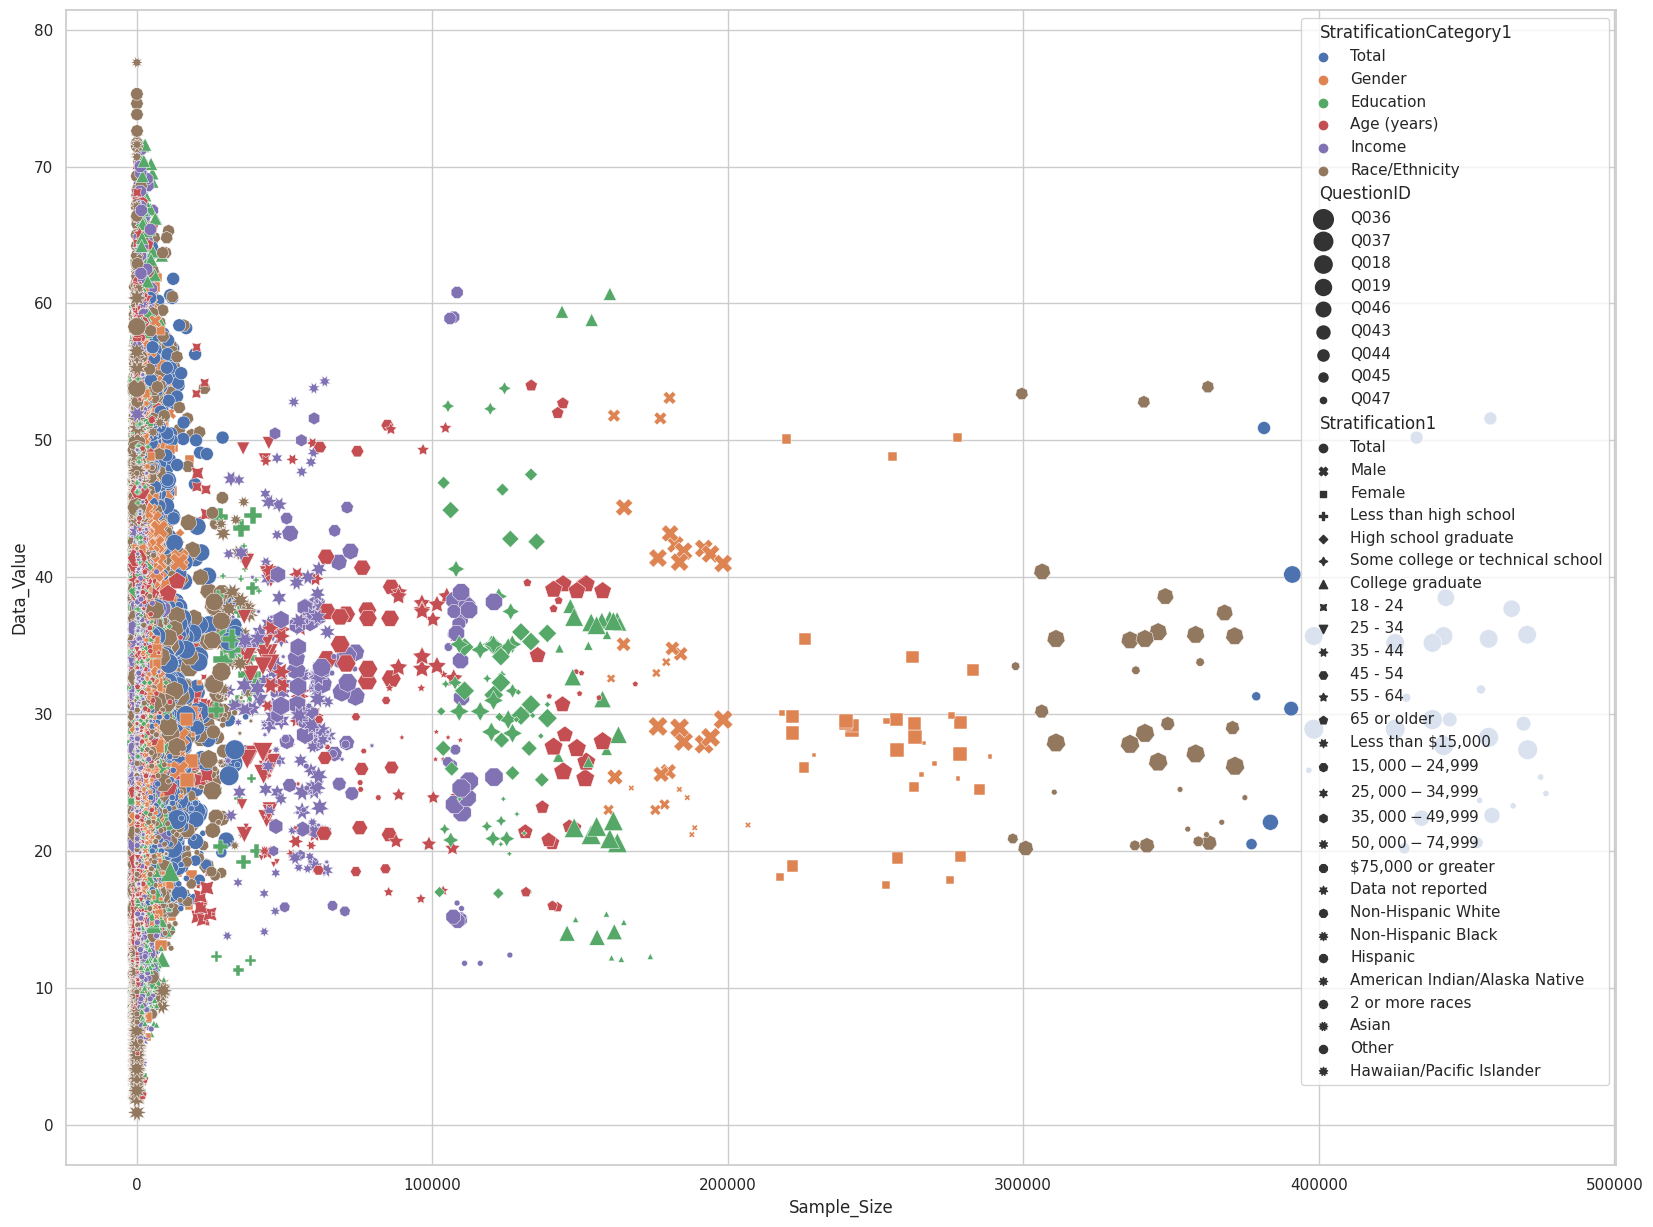

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=df["Sample_Size"], y=df["Data_Value"], hue=df["StratificationCategory1"], style=df["Stratification1"], size=df["QuestionID"], sizes=(20, 200), legend="full")

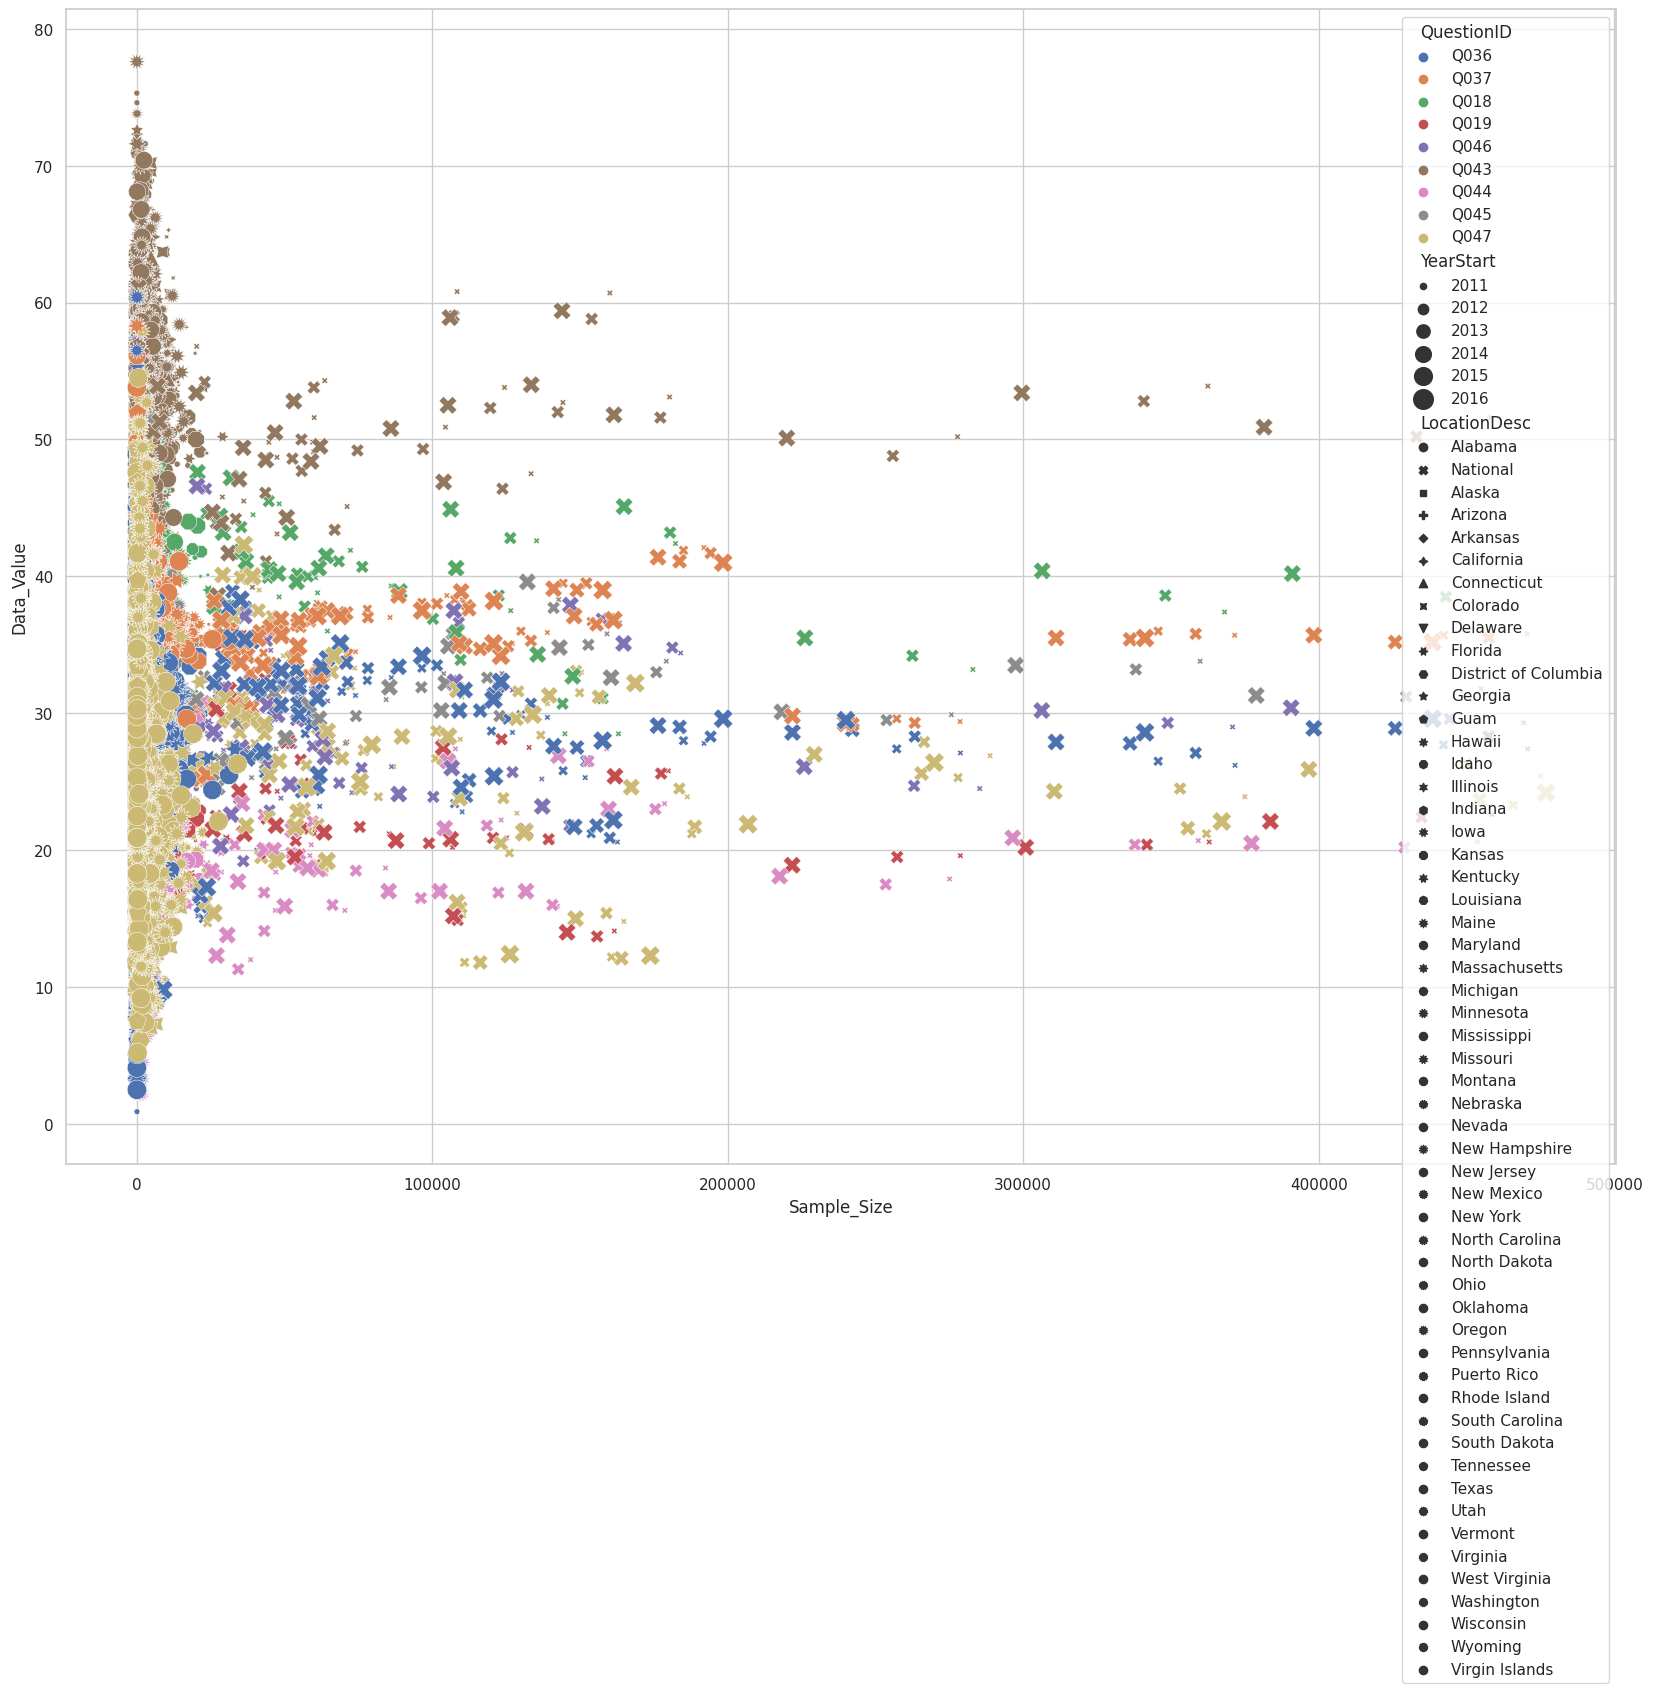

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=df["Sample_Size"], y=df["Data_Value"], hue=df["QuestionID"], style=df["LocationDesc"], size=df["YearStart"], sizes=(20, 200), legend="full")

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=df["Sample_Size"], y=df["Data_Value"], hue=df["QuestionID"], style=df["LocationDesc"], size=df["YearStart"], sizes=(20, 200), legend="full")

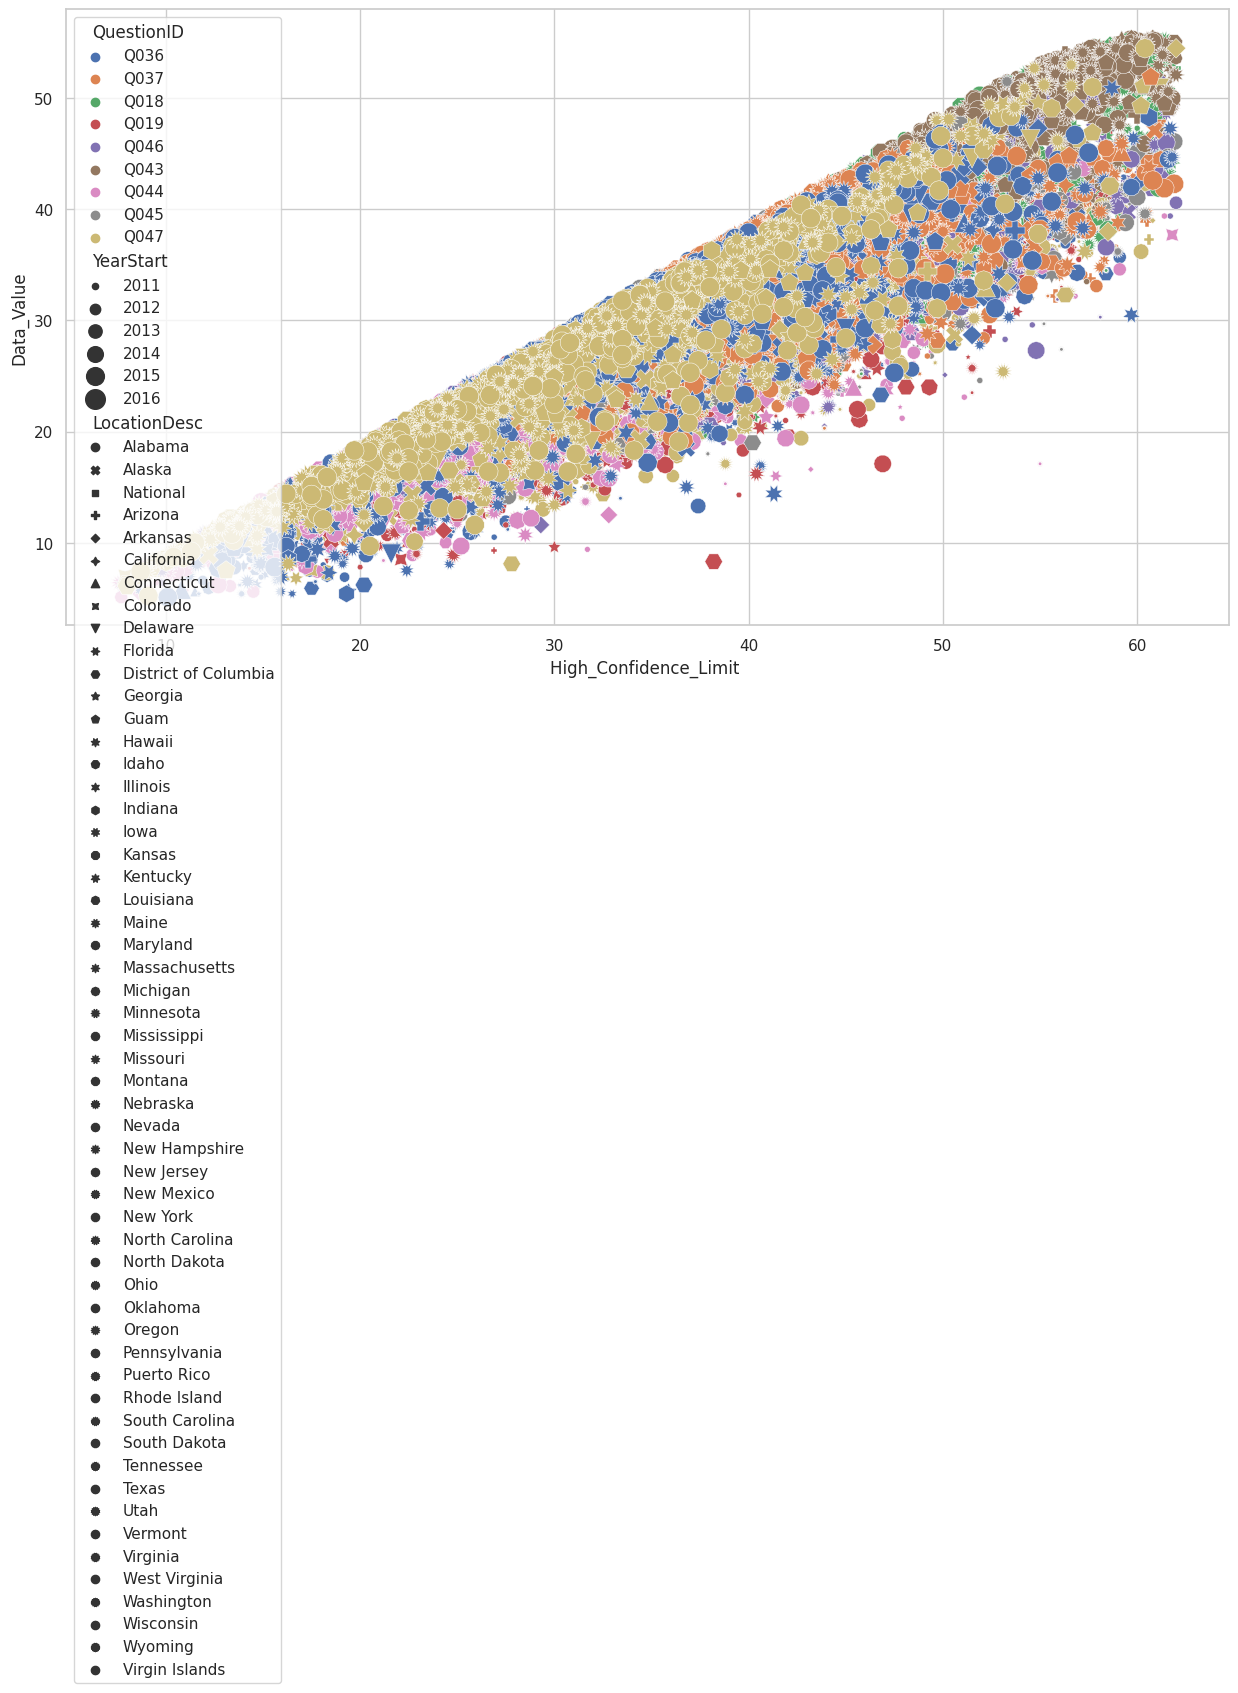

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=cleaned_df["High_Confidence_Limit "], y=cleaned_df["Data_Value"], hue=cleaned_df["QuestionID"], style=cleaned_df["LocationDesc"],size=cleaned_df["YearStart"], sizes=(20, 200), legend="full")

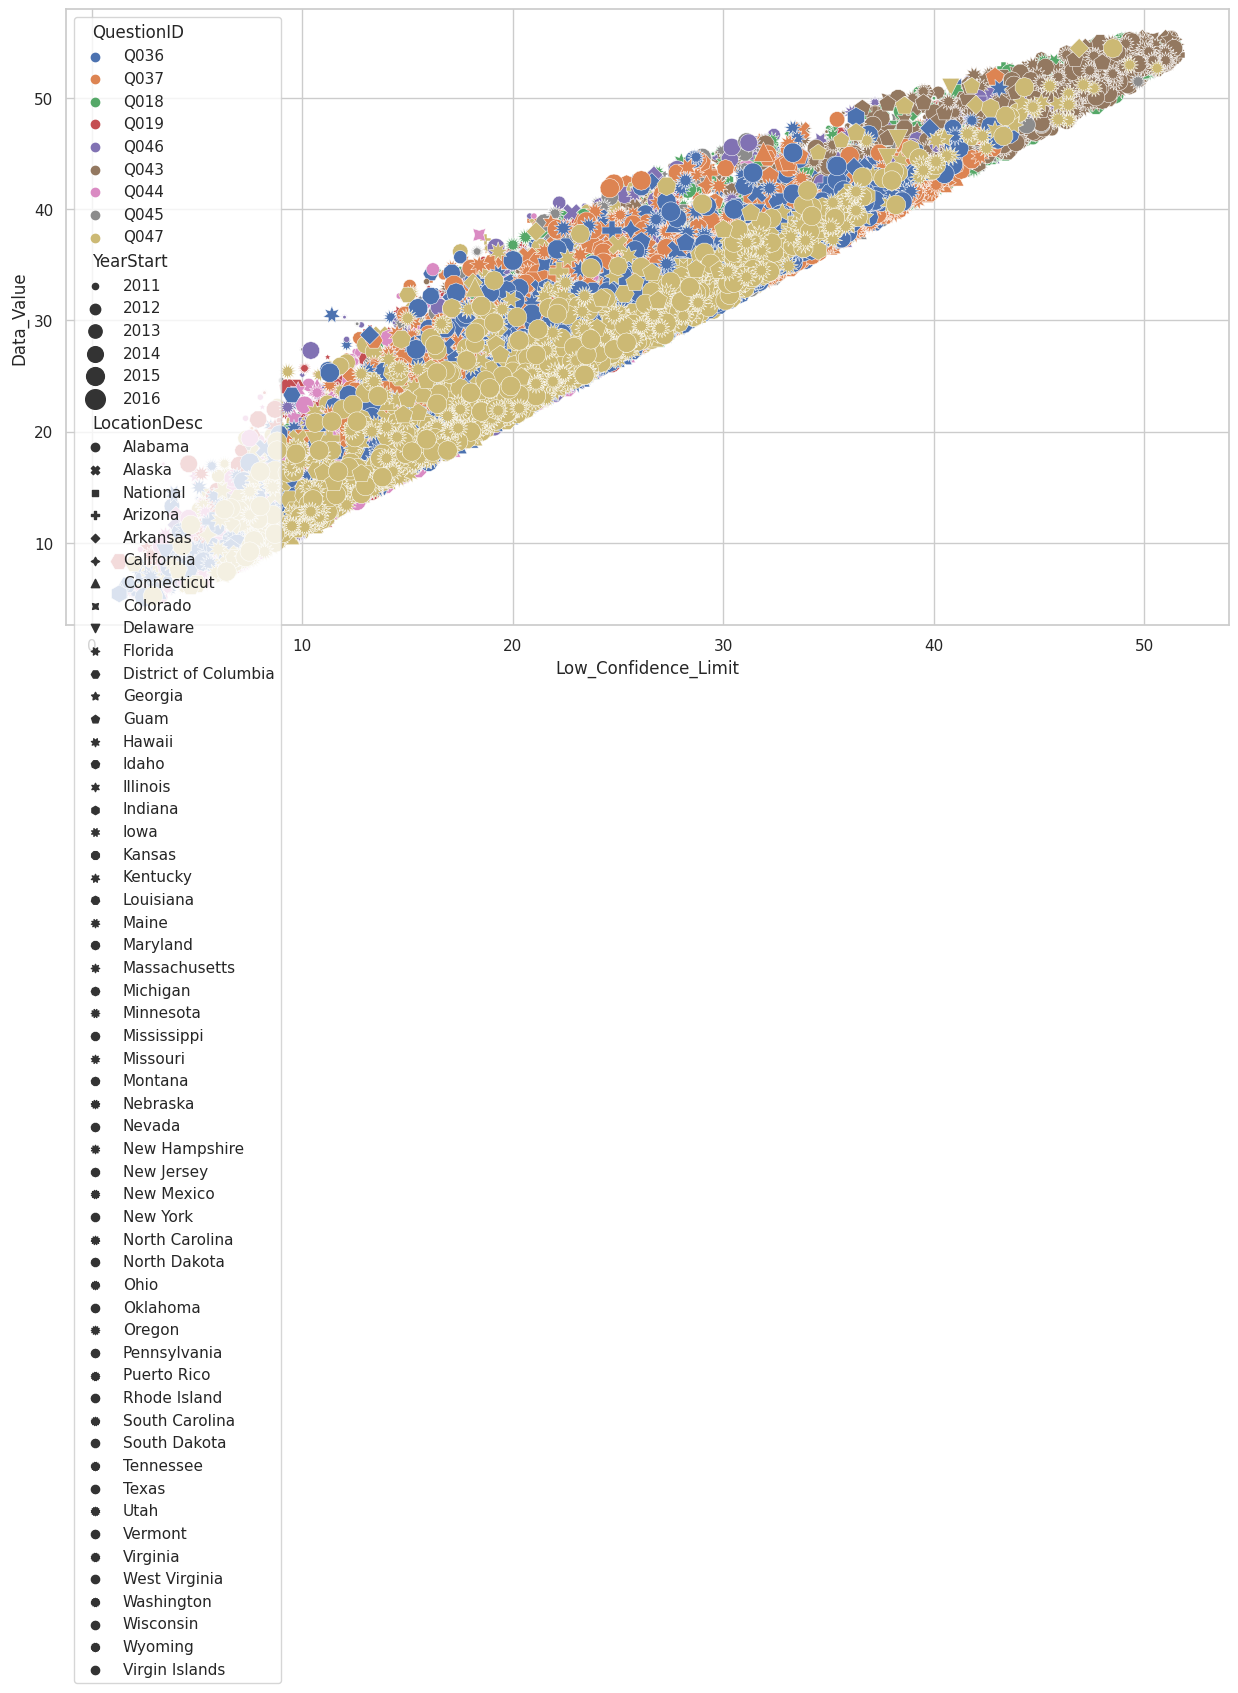

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=cleaned_df["Low_Confidence_Limit"], y=cleaned_df["Data_Value"], hue=cleaned_df["QuestionID"], style=cleaned_df["LocationDesc"],size=cleaned_df["YearStart"], sizes=(20, 200), legend="full")

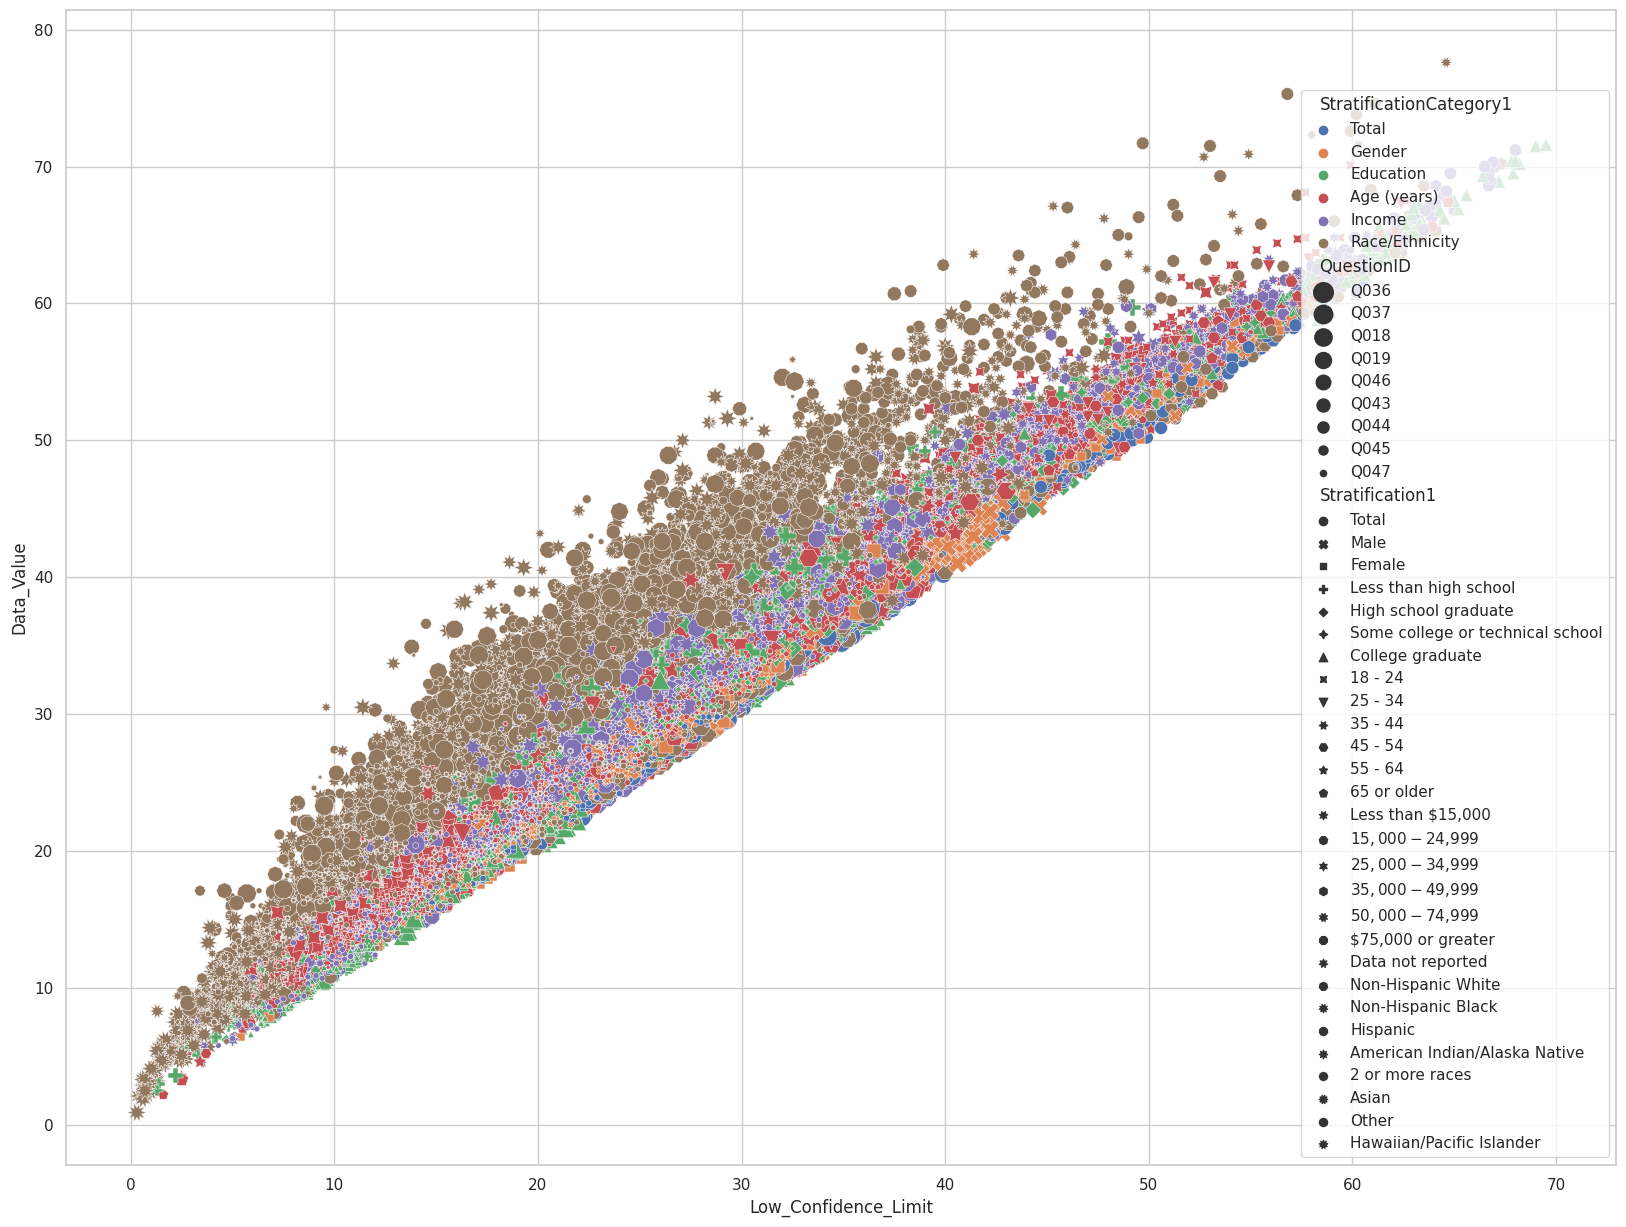

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=df["Low_Confidence_Limit"], y=df["Data_Value"], hue=df["StratificationCategory1"], style=df["Stratification1"], size=df["QuestionID"], sizes=(20, 200), legend="full")

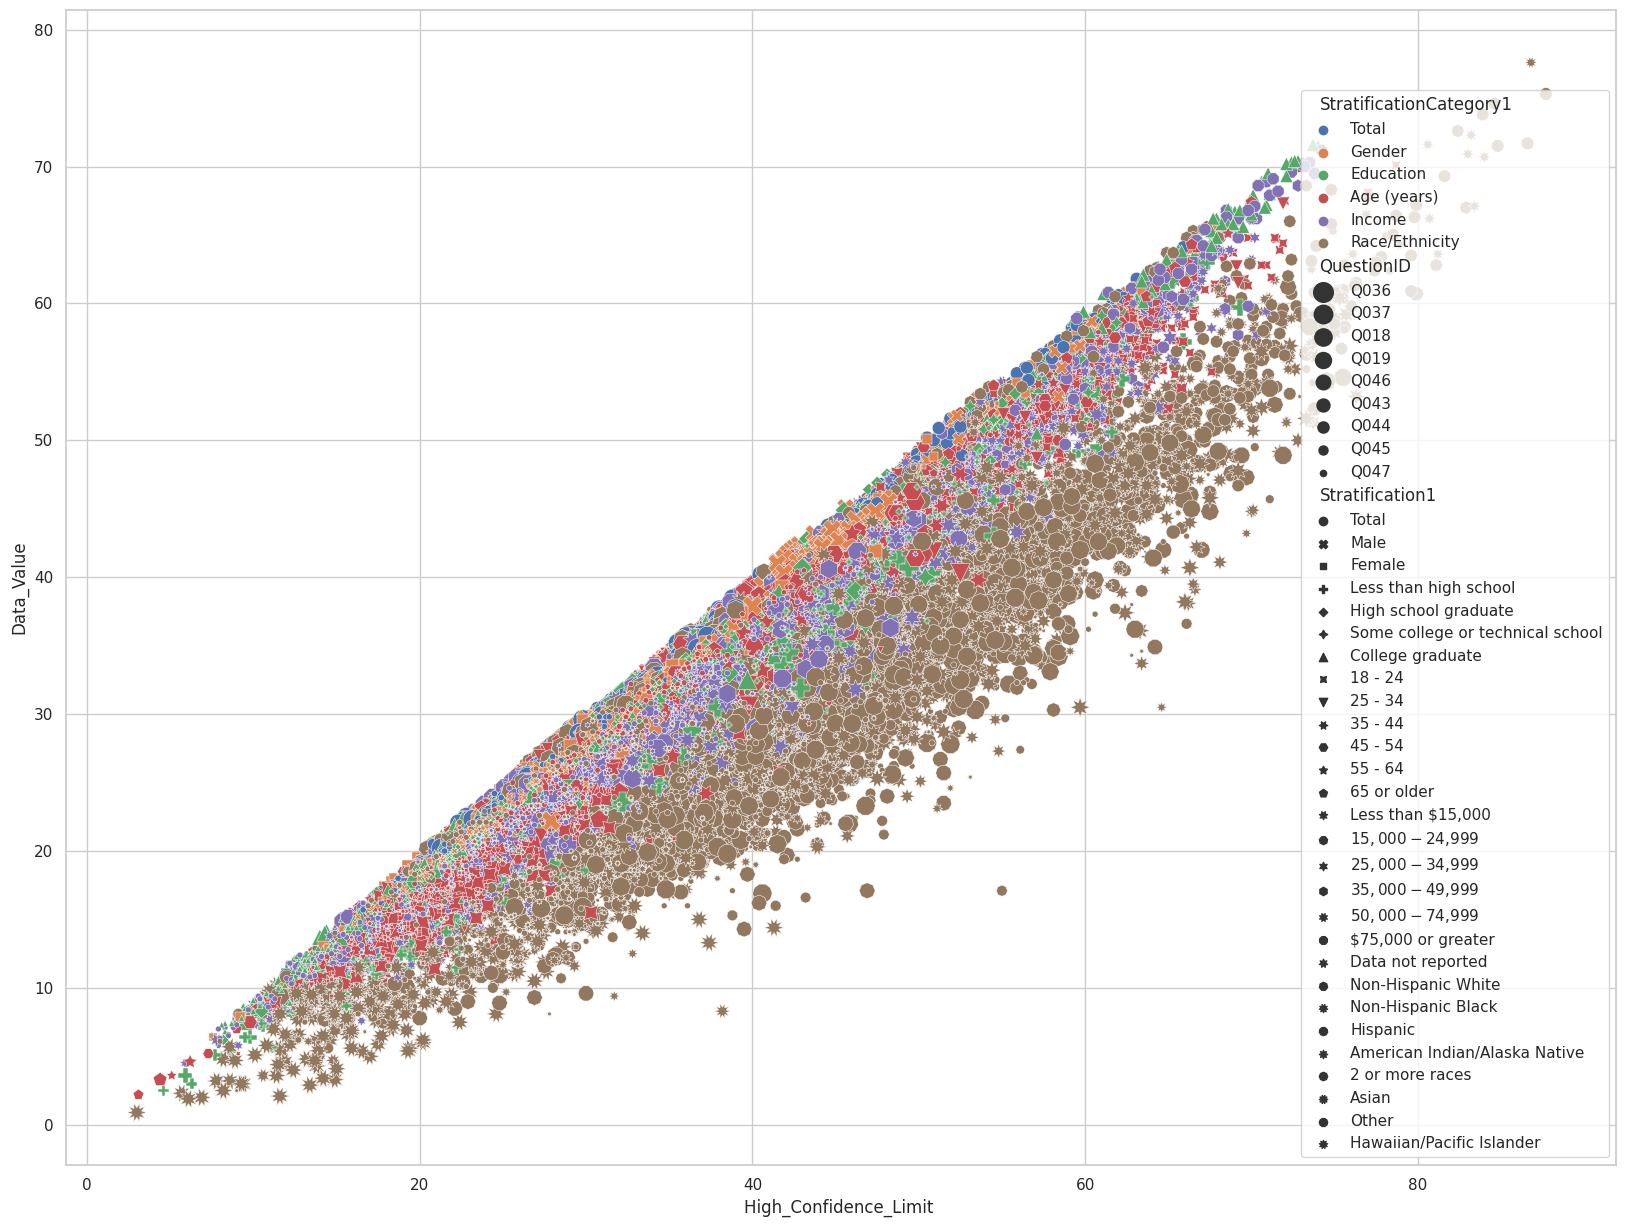

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x=df["High_Confidence_Limit "], y=df["Data_Value"], hue=df["StratificationCategory1"], style=df["Stratification1"], size=df["QuestionID"], sizes=(20, 200), legend="full")

In [ ]:
df.columns

Index(['index', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'GeoLocation', 'ClassID',
       'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [ ]:
import datetime

cleaned_df['Recency'] = cleaned_df['YearStart'].apply(lambda x: (2023 - x))

In [ ]:
cleaned_df[['YearStart', 'Recency']]

YearStart  Recency
1           2011       12
2           2011       12
3           2011       12
4           2011       12
5           2011       12
...          ...      ...
48341       2016        7
48342       2016        7
48343       2016        7
48344       2016        7
48345       2016        7

[42196 rows x 2 columns]

In [ ]:
#
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df['LocationDesc']))
cleaned_df['city_cat'] = cleaned_df['LocationDesc'].apply(lambda x: le.transform([x])[0])
cleaned_df[['city_cat', 'LocationDesc']]

city_cat    LocationDesc
1             0         Alabama
2             0         Alabama
3             0         Alabama
4             0         Alabama
5             0         Alabama
...         ...             ...
48341        49  Virgin Islands
48342        49  Virgin Islands
48343        49  Virgin Islands
48344        49  Virgin Islands
48345        49  Virgin Islands

[42196 rows x 2 columns]

In [ ]:
tenpref_le = preprocessing.LabelEncoder()
tenpref_le.fit(list(cleaned_df['QuestionID']))
cleaned_df['QID'] = cleaned_df['QuestionID'].apply(lambda x: tenpref_le.transform([x])[0])
cleaned_df[['QuestionID', 'QID']]

QuestionID  QID
1           Q036    2
2           Q036    2
3           Q036    2
4           Q036    2
5           Q036    2
...          ...  ...
48341       Q047    8
48342       Q047    8
48343       Q047    8
48344       Q047    8
48345       Q047    8

[42196 rows x 2 columns]

In [ ]:
tenpref_le = preprocessing.LabelEncoder()
tenpref_le.fit(list(cleaned_df['StratificationCategory1']))
cleaned_df['SC1'] = cleaned_df['StratificationCategory1'].apply(lambda x: tenpref_le.transform([x])[0])
cleaned_df[['StratificationCategory1', 'SC1']]

StratificationCategory1  SC1
1                      Gender    2
2                      Gender    2
3                   Education    1
4                   Education    1
5                   Education    1
...                       ...  ...
48341                  Income    3
48342                  Income    3
48343          Race/Ethnicity    4
48344          Race/Ethnicity    4
48345          Race/Ethnicity    4

[42196 rows x 2 columns]

In [ ]:
tenpref_le = preprocessing.LabelEncoder()
tenpref_le.fit(list(cleaned_df['Stratification1']))
cleaned_df['S1'] = cleaned_df['Stratification1'].apply(lambda x: tenpref_le.transform([x])[0])
cleaned_df[['Stratification1', 'S1']]


Stratification1  S1
1                                  Male  22
2                                Female  16
3                 Less than high school  21
4                  High school graduate  18
5      Some college or technical school  26
...                                 ...  ..
48341                $75,000 or greater   4
48342                 Data not reported  15
48343                Non-Hispanic White  24
48344                Non-Hispanic Black  23
48345                          Hispanic  19

[42196 rows x 2 columns]

In [ ]:
tenpref_le = preprocessing.LabelEncoder()
tenpref_le.fit(list(cleaned_df['TopicID']))
cleaned_df['TID'] = cleaned_df['TopicID'].apply(lambda x: tenpref_le.transform([x])[0])
cleaned_df[['TopicID', 'TID']]

TopicID  TID
1        OWS1    1
2        OWS1    1
3        OWS1    1
4        OWS1    1
5        OWS1    1
...       ...  ...
48341     PA1    2
48342     PA1    2
48343     PA1    2
48344     PA1    2
48345     PA1    2

[42196 rows x 2 columns]

In [ ]:
cleaned_df

index  YearStart  YearEnd LocationAbbr    LocationDesc  \
1          1       2011     2011           AL         Alabama   
2          2       2011     2011           AL         Alabama   
3          3       2011     2011           AL         Alabama   
4          4       2011     2011           AL         Alabama   
5          5       2011     2011           AL         Alabama   
...      ...        ...      ...          ...             ...   
48341  53382       2016     2016           VI  Virgin Islands   
48342  53383       2016     2016           VI  Virgin Islands   
48343  53384       2016     2016           VI  Virgin Islands   
48344  53385       2016     2016           VI  Virgin Islands   
48345  53386       2016     2016           VI  Virgin Islands   

                                       Datasource                    Class  \
1      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
5      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
...                                           ...                      ...   
48341  Behavioral Risk Factor Surveillance System        Physical Activity   
48342  Behavioral Risk Factor Surveillance System        Physical Activity   
48343  Behavioral Risk Factor Surveillance System        Physical Activity   
48344  Behavioral Risk Factor Surveillance System        Physical Activity   
48345  Behavioral Risk Factor Surveillance System        Physical Activity   

                              Topic  \
1           Obesity / Weight Status   
2           Obesity / Weight Status   
3           Obesity / Weight Status   
4           Obesity / Weight Status   
5           Obesity / Weight Status   
...                             ...   
48341  Physical Activity - Behavior   
48342  Physical Activity - Behavior   
48343  Physical Activity - Behavior   
48344  Physical Activity - Behavior   
48345  Physical Activity - Behavior   

                                                Question Data_Value_Type  ...  \
1      Percent of adults aged 18 years and older who ...           Value  ...   
2      Percent of adults aged 18 years and older who ...           Value  ...   
3      Percent of adults aged 18 years and older who ...           Value  ...   
4      Percent of adults aged 18 years and older who ...           Value  ...   
5      Percent of adults aged 18 years and older who ...           Value  ...   
...                                                  ...             ...  ...   
48341  Percent of adults who engage in no leisure-tim...           Value  ...   
48342  Percent of adults who engage in no leisure-tim...           Value  ...   
48343  Percent of adults who engage in no leisure-tim...           Value  ...   
48344  Percent of adults who engage in no leisure-tim...           Value  ...   
48345  Percent of adults who engage in no leisure-tim...           Value  ...   

       StratificationCategory1                   Stratification1  \
1                       Gender                              Male   
2                       Gender                            Female   
3                    Education             Less than high school   
4                    Education              High school graduate   
5                    Education  Some college or technical school   
...                        ...                               ...   
48341                   Income                $75,000 or greater   
48342                   Income                 Data not reported   
48343           Race/Ethnicity                Non-Hispanic White   
48344           Race/Ethnicity                Non-Hispanic Black   
48345           Race/Ethnicity                          Hispanic   

       StratificationCategoryI

In [ ]:
cleaned_df.columns

Index(['index', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'GeoLocation', 'ClassID',
       'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1', 'Recency', 'city_cat',
       'QID', 'SC1', 'S1', 'TID'],
      dtype='object')

<Axes: >

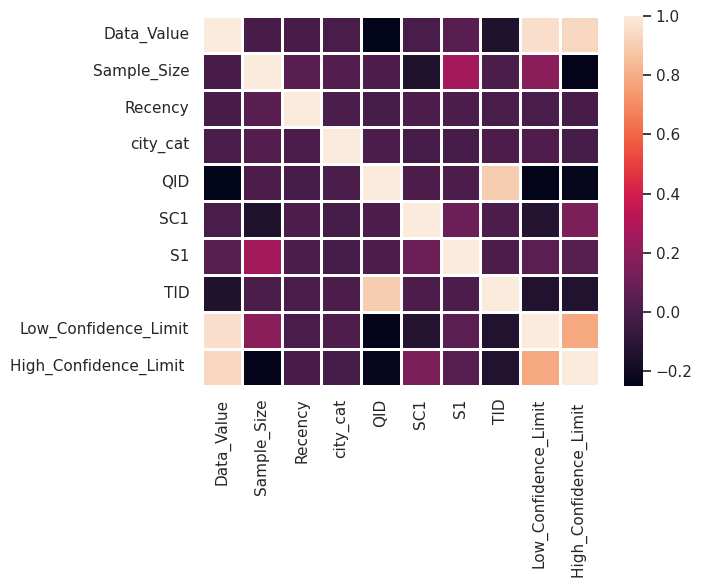

In [ ]:
new_df = cleaned_df[["Data_Value", "Sample_Size", "Recency", "city_cat", "QID","SC1","S1","TID","Low_Confidence_Limit","High_Confidence_Limit "]]
sns.heatmap(data=new_df.corr(), lw = 1)

In [ ]:
data_df = cleaned_df[["Data_Value", "Sample_Size", "Recency", "city_cat", "QID","SC1","S1","TID","Low_Confidence_Limit","High_Confidence_Limit "]]
data_df.head()

Data_Value  Sample_Size  Recency  city_cat  QID  SC1  S1  TID  \
1        32.3       2581.0       12         0    2    2  22    1   
2        31.8       4723.0       12         0    2    2  16    1   
3        33.6       1153.0       12         0    2    1  21    1   
4        32.8       2402.0       12         0    2    1  18    1   
5        33.8       1925.0       12         0    2    1  26    1   

   Low_Confidence_Limit  High_Confidence_Limit   
1                  29.9                    34.7  
2                  30.0                    33.6  
3                  29.9                    37.6  
4                  30.2                    35.6  
5                  31.0                    36.8

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, cleaned_df["Data_Value"], random_state=42, test_size=0.20)

In [ ]:
X_train

Data_Value  Sample_Size  Recency  city_cat  QID  SC1  S1  TID  \
37348        49.6       4299.0        8        22    4    2  16    2   
34525        18.5        355.0        8        54    1    0   7    0   
23466        29.8        637.0       12        39    2    3   1    1   
32896        48.7        717.0        8        19    0    3  15    0   
30233        31.4       2920.0       12        52    3    2  16    1   
...           ...          ...      ...       ...  ...  ...  ..  ...   
6971         42.2       1037.0       12        12    0    3   2    0   
12679        41.0       4849.0       10        21    3    2  22    1   
43814        33.4        916.0        8        50    3    3   2    1   
927          26.4       3194.0       10         1    2    4  24    1   
18572        32.8        808.0       12        31    3    3   0    1   

       Low_Confidence_Limit  High_Confidence_Limit   
37348                  47.5                    51.7  
34525                  14.1                    23.9  
23466                  24.6                    35.6  
32896                  43.7                    53.8  
30233                  29.4                    33.5  
...                     ...                     ...  
6971                   37.5                    46.9  
12679                  38.9                    43.1  
43814                  29.4                    37.8  
927                    24.4                    28.5  
18572                  28.5                    37.3  

[33756 rows x 10 columns]

In [ ]:
y_train

37348    49.6
34525    18.5
23466    29.8
32896    48.7
30233    31.4
         ... 
6971     42.2
12679    41.0
43814    33.4
927      26.4
18572    32.8
Name: Data_Value, Length: 33756, dtype: float64

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((33756, 10), (8440, 10))

In [ ]:
X_train_scaled

array([[ 2.07757064,  2.36045561, -1.00851717, ...,  0.91163761,
         2.36289033,  1.60356193],
       [-1.27593201, -0.87577452, -1.00851717, ..., -1.77398784,
        -1.28530188, -1.13973797],
       [-0.05745677, -0.64438078,  1.35237713, ..., -0.43117511,
        -0.1384151 ,  0.0148163 ],
       ...,
       [ 0.33073003, -0.41544868, -1.00851717, ..., -0.43117511,
         0.38587599,  0.23191198],
       [-0.42407764,  1.45375321,  0.17192998, ..., -0.43117511,
        -0.16026057, -0.68581065],
       [ 0.26603223, -0.50406756,  1.35237713, ..., -0.43117511,
         0.28757141,  0.18257205]])

In [ ]:
X_test_scaled

array([[-1.47002541,  0.50766463,  1.35237713, ...,  0.91163761,
        -1.26345641, -1.57392932],
       [ 1.76486461, -0.86674852,  0.17192998, ..., -1.77398784,
         1.65291281,  1.6923738 ],
       [-0.06823973, -0.20538912,  0.76215356, ...,  0.91163761,
         0.09096225, -0.2516193 ],
       ...,
       [ 0.7296998 , -0.58940426,  1.35237713, ..., -1.77398784,
         0.72448066,  0.64636736],
       [-0.77991554,  0.70213383,  0.76215356, ..., -0.43117511,
        -0.56440162, -0.96211424],
       [ 0.70813387,  0.3090927 ,  1.35237713, ...,  0.91163761,
         0.8446307 ,  0.48847959]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}


In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.169278870368998e-14 {}
RandomForestRegressor 0.003725937796282097 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 0.0010265945598435843 {'learning_rate': 0.1, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=710, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


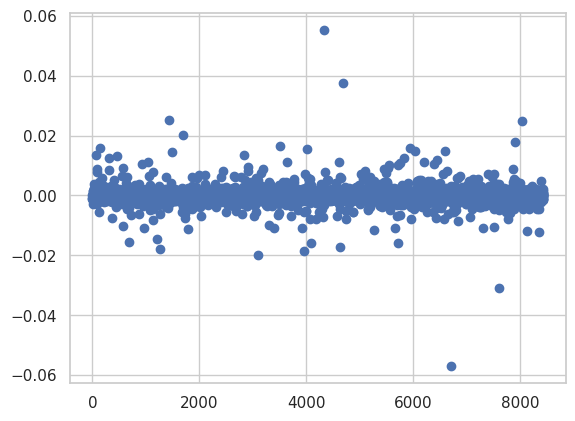

In [ ]:
model_results = eval_models()

In [ ]:
model_results

Train_RMSE Test_RMSE Train_MAE  Test_MAE  \
LinearRegression             0.0       0.0       0.0       0.0   
RandomForestRegressor   0.003726  0.003887  0.000909  0.000905   
XGBRegressor            0.001027  0.001933  0.000714  0.000889   

                                                       best_params  
LinearRegression                                                {}  
RandomForestRegressor         {'max_depth': 9, 'n_estimators': 45}  
XGBRegressor           {'learning_rate': 0.1, 'n_estimators': 710}